In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

NUM_ITERATIONS = 1000
NUM_USER = 943
NUM_MOVIE = 1682
K = 30

In [2]:
#load dataset
def load_dataset(path):
    with open(path,"r") as f:
        m = NUM_USER
        n = NUM_MOVIE        
        R = np.zeros((m,n))       

        for line in f:
            fields = line.strip().split("\t")
            user_id, movie_id = map(int, (fields[0],fields[1]))
            R[user_id-1][movie_id-1] = float(fields[2])
                
        return R        


R_train = load_dataset("./ml-100k/u1.base")
R_valid = load_dataset("./ml-100k/u1.test")
# print(R_train)

In [3]:
# initialization
k = K
m = NUM_USER
n = NUM_MOVIE    
P = np.random.rand(m,k)
Q = np.random.rand(n,k)

In [4]:
#SGD
def sgdmf(R_train, R_valid, P, Q, K, iterations=NUM_ITERATIONS, learning_rate=0.0002,lamda=0.02):
    Q = Q.T
    R = R_train
    loss_valid_history = []
    epoch_set=[]
    last_e = 1000000
    for epoch in range(iterations):
        for i in range(m):
            for j in range(n):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + learning_rate * (2 * eij * Q[k][j] - lamda * P[i][k])
                        Q[k][j] = Q[k][j] + learning_rate * (2 * eij * P[i][k] - lamda * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in range(m):
            for j in range(n):
                if R_valid[i][j] > 0:
                    e = e + pow(R_valid[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (lamda/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        loss_valid_history.append(e)
        if epoch % 10 == 0:
            print("epoch",epoch)
            print("Loss of validation set:",e)
            print("-------------------------------------")
        if e < 0.001 or (e - last_e)>0:
            break
        else:
            last_e = e
            
    return P, Q.T, loss_valid_history

In [5]:
nP, nQ, loss_valid_history = sgdmf(R_train, R_valid, P, Q, K)
nR = np.dot(nP, nQ.T)

epoch 0
Loss of validation set: 134153.036198
-------------------------------------
epoch 10
Loss of validation set: 37549.8893656
-------------------------------------
epoch 20
Loss of validation set: 31239.5131917
-------------------------------------
epoch 30
Loss of validation set: 28464.0041149
-------------------------------------
epoch 40
Loss of validation set: 26868.5604622
-------------------------------------
epoch 50
Loss of validation set: 25837.6761304
-------------------------------------
epoch 60
Loss of validation set: 25126.3249206
-------------------------------------
epoch 70
Loss of validation set: 24615.424024
-------------------------------------
epoch 80
Loss of validation set: 24239.2689511
-------------------------------------
epoch 90
Loss of validation set: 23958.2352451
-------------------------------------
epoch 100
Loss of validation set: 23746.827182
-------------------------------------
epoch 110
Loss of validation set: 23587.827734
--------------------

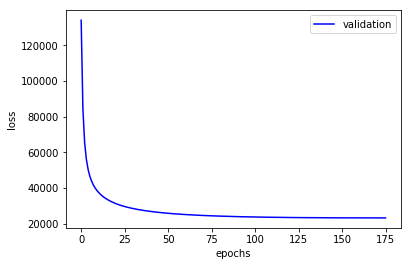

In [8]:
plt.figure()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(loss_valid_history,color='blue',label='validation',linewidth=1.5,linestyle='-')
plt.legend(loc='upper right')
plt.show()